In [1]:
# We need to import these modules to get started
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# seaborn makes pretty plots & sets font sizes nicely
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

# magic functions for jupyter notebook plotting
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# confirm that you are currently using the newest version of SDK (2.16.2)
import allensdk
allensdk.__version__

'2.16.2'

In [3]:
import platform
platstring = platform.platform()

if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS 
    data_root = "/Volumes/Brain2024/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on CodeOcean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2024/"

In [4]:
# import behavior projet cache class from SDK to be able to load the data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

cache = VisualBehaviorOphysProjectCache.from_local_cache(cache_dir=data_root, use_static_cache=True)
# if we needed to download the data we could have used the following line
# cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_root)  

# Get table describing ophys experiments 
ophys_experiments = cache.get_ophys_experiment_table()  

print('Number of ophys experiments = {}'.format(len(ophys_experiments)))

# get metadata tables
behavior_sessions = cache.get_behavior_session_table()


ophys_sessions = cache.get_ophys_session_table()


ophys_cells = cache.get_ophys_cells_table()

#print number of items in each table for all imaging and behavioral sessions
print('Number of behavior sessions = {}'.format(len(behavior_sessions)))
print('Number of ophys sessions = {}'.format(len(ophys_sessions)))


Number of ophys experiments = 1936
Number of behavior sessions = 4782
Number of ophys sessions = 703


/opt/conda/lib/python3.10/site-packages/allensdk/brain_observatory/behavior/behavior_project_cache/behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by using: 
	`stimulus_presentations[stimulus_presentations.stimulus_block_name.str.contains('change_detection')]`
  warnings.warn(


In [5]:
print('there are ', len(behavior_sessions.mouse_id.unique()), 'mice in the dataset \n\n')

print('the different transgenic lines included in this dataset are:\n')
print(np.sort(behavior_sessions.full_genotype.unique()))
print('\n\n')

print('the different cre lines used in this dataset are:\n')
print(np.sort(behavior_sessions.cre_line.unique()))
print('\n\n')

print('the different reporter lines used in this dataset are:\n')
print(np.sort(behavior_sessions.reporter_line.unique()))
print('\n\n')

print('the different indicators used in this dataset are:\n')
print(np.sort(behavior_sessions.indicator.unique()))

there are  107 mice in the dataset 


the different transgenic lines included in this dataset are:

['Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt'
 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-GCaMP6s)/wt'
 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt'
 'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt']



the different cre lines used in this dataset are:

['Slc17a7-IRES2-Cre' 'Sst-IRES-Cre' 'Vip-IRES-Cre']



the different reporter lines used in this dataset are:

['Ai148(TIT2L-GC6f-ICL-tTA2)' 'Ai93(TITL-GCaMP6f)' 'Ai94(TITL-GCaMP6s)']



the different indicators used in this dataset are:

['GCaMP6f' 'GCaMP6s']


In [6]:
behavior_sessions

,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,age_in_days,...,num_targeted_structures,go_trial_count,correct_reject_trial_count,trial_count,engaged_trial_count,file_id,catch_trial_count,miss_trial_count,hit_trial_count,false_alarm_trial_count
behavior_session_id,,,,,,,,,,,,,,,,,,,,,
870987812,<NA>,NaN,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,80,...,<NA>,0,0,121,70,1941,0,0,0,0
872953842,<NA>,NaN,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,84,...,<NA>,293,45,564,27,1942,49,275,18,4
873774125,<NA>,NaN,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,85,...,<NA>,314,38,548,0,1943,41,300,14,3
874790261,<NA>,NaN,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,86,...,<NA>,326,42,492,0,1944,42,312,14,0
875207834,<NA>,NaN,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,87,...,<NA>,322,41,504,5,1945,44,300,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993537991,993512923,[991913246],489066,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,128,...,1,357,52,410,0,-999,52,357,0,0
993691759,993668836,[991913246],489066,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,129,...,1,200,20,725,314,-999,26,114,86,6
993959724,993948045,[991913246],489066,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,130,...,1,353,49,402,0,-999,49,353,0,0


In [7]:
# how many mice of each genotype are in the dataset?
behavior_sessions.groupby(['full_genotype', 'mouse_id']).count().reset_index().groupby('full_genotype').count()[['mouse_id']]


,mouse_id
full_genotype,
Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt,47
Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-GCaMP6s)/wt,8
Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,24
Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,28


In [8]:
print('the session_types available in this dataset are:\n')
print(np.sort(behavior_sessions.session_type[
                  ~behavior_sessions.session_type.isna()].unique()))

#behavior_session_table.groupby('session_type','ophys_)[['ophys_session_id', 'ophys_container_id']].head()
                         

the session_types available in this dataset are:

['OPHYS_0_images_A_habituation' 'OPHYS_0_images_B_habituation'
 'OPHYS_0_images_G_habituation' 'OPHYS_1_images_A' 'OPHYS_1_images_B'
 'OPHYS_1_images_G' 'OPHYS_2_images_A_passive' 'OPHYS_2_images_B_passive'
 'OPHYS_2_images_G_passive' 'OPHYS_3_images_A' 'OPHYS_3_images_B'
 'OPHYS_3_images_G' 'OPHYS_4_images_A' 'OPHYS_4_images_B'
 'OPHYS_4_images_H' 'OPHYS_5_images_A_passive' 'OPHYS_5_images_B_passive'
 'OPHYS_5_images_H_passive' 'OPHYS_6_images_A' 'OPHYS_6_images_B'
 'OPHYS_6_images_H' 'TRAINING_0_gratings_autorewards_15min'
 'TRAINING_1_gratings' 'TRAINING_2_gratings_flashed'
 'TRAINING_3_images_A_10uL_reward' 'TRAINING_3_images_B_10uL_reward'
 'TRAINING_3_images_G_10uL_reward' 'TRAINING_4_images_A_handoff_lapsed'
 'TRAINING_4_images_A_handoff_ready' 'TRAINING_4_images_A_training'
 'TRAINING_4_images_B_training' 'TRAINING_4_images_G_training'
 'TRAINING_5_images_A_epilogue' 'TRAINING_5_images_A_handoff_lapsed'
 'TRAINING_5_images_A_han

In [9]:
for project_code in behavior_sessions.project_code.unique(): 
    project_sessions = behavior_sessions[behavior_sessions.project_code==project_code]
    print('\n project_code:', project_code)
    print('\n has these session types:\n', np.sort(
        project_sessions.session_type[~project_sessions.session_type.isna()].unique()))
    print('\n')


 project_code: VisualBehaviorMultiscope

 has these session types:
 ['OPHYS_0_images_A_habituation' 'OPHYS_1_images_A'
 'OPHYS_2_images_A_passive' 'OPHYS_3_images_A' 'OPHYS_3_images_B'
 'OPHYS_4_images_B' 'OPHYS_5_images_A_passive' 'OPHYS_5_images_B_passive'
 'OPHYS_6_images_A' 'OPHYS_6_images_B'
 'TRAINING_0_gratings_autorewards_15min' 'TRAINING_1_gratings'
 'TRAINING_2_gratings_flashed' 'TRAINING_3_images_A_10uL_reward'
 'TRAINING_4_images_A_training' 'TRAINING_5_images_A_epilogue'
 'TRAINING_5_images_A_handoff_lapsed' 'TRAINING_5_images_A_handoff_ready']



 project_code: VisualBehaviorTask1B

 has these session types:
 ['OPHYS_0_images_A_habituation' 'OPHYS_0_images_B_habituation'
 'OPHYS_1_images_B' 'OPHYS_2_images_B_passive' 'OPHYS_3_images_B'
 'OPHYS_4_images_A' 'OPHYS_4_images_B' 'OPHYS_5_images_A_passive'
 'OPHYS_6_images_A' 'TRAINING_0_gratings_autorewards_15min'
 'TRAINING_1_gratings' 'TRAINING_2_gratings_flashed'
 'TRAINING_3_images_B_10uL_reward' 'TRAINING_4_images_B_trai

In [10]:
# Add a column containing the behavioral session index for each mouse

# sort the behavioral sessions table by mouse ID and acquisition date
behavior_sessions = behavior_sessions.sort_values(by=['cre_line', 'mouse_id', 'date_of_acquisition'])
behavior_sessions[['mouse_id', 'cre_line', 'sex', 'date_of_acquisition', 'session_type']]

,mouse_id,cre_line,sex,date_of_acquisition,session_type
behavior_session_id,,,,,
742008131,403491,Slc17a7-IRES2-Cre,F,2018-08-24 14:51:25.667000+00:00,TRAINING_0_gratings_autorewards_15min
742797917,403491,Slc17a7-IRES2-Cre,F,2018-08-27 14:17:50.656000+00:00,TRAINING_1_gratings
743041166,403491,Slc17a7-IRES2-Cre,F,2018-08-28 13:26:23.768000+00:00,TRAINING_1_gratings
743660302,403491,Slc17a7-IRES2-Cre,F,2018-08-29 13:20:08.261000+00:00,TRAINING_1_gratings
744374168,403491,Slc17a7-IRES2-Cre,F,2018-08-30 13:00:52.782000+00:00,TRAINING_1_gratings
...,...,...,...,...,...
1106747269,563234,Vip-IRES-Cre,F,2021-06-01 09:13:39.547000+00:00,OPHYS_5_images_H_passive
1106963518,563234,Vip-IRES-Cre,F,2021-06-02 08:48:47.905000+00:00,OPHYS_6_images_H
1107356081,563234,Vip-IRES-Cre,F,2021-06-04 09:05:22.926000+00:00,OPHYS_4_images_H


In [11]:

# group by mouse, then add an index to the behavioral sessions for each individual mouse
# grouped = behavior_sessions.groupby('mouse_id', as_index=False)
# behavior_sessions = grouped.apply(lambda x: x.reset_index(drop=True)).reset_index()
# behavior_sessions

behavior_sessions['session_index'] = behavior_sessions.groupby('mouse_id').cumcount()
behavior_sessions

,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,age_in_days,...,go_trial_count,correct_reject_trial_count,trial_count,engaged_trial_count,file_id,catch_trial_count,miss_trial_count,hit_trial_count,false_alarm_trial_count,session_index
behavior_session_id,,,,,,,,,,,,,,,,,,,,,
742008131,<NA>,NaN,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,84,...,0,0,109,99,5784,0,0,0,0,0
742797917,<NA>,NaN,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,87,...,141,12,1517,164,5785,21,69,72,9,1
743041166,<NA>,NaN,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,88,...,66,1,1423,98,5786,7,8,58,6,2
743660302,<NA>,NaN,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,89,...,47,0,1423,64,5787,3,2,45,3,3
744374168,<NA>,NaN,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,90,...,42,0,1574,25,5788,6,0,42,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106747269,<NA>,NaN,563234,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,182,...,354,50,404,0,4215,50,354,0,0,62
1106963518,1106922443,"[1103781349, 1103781361, 1115891308, 111589131...",563234,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,183,...,319,46,449,139,-999,47,270,49,1,63
1107356081,1107338686,"[1103781349, 1103781361, 1115891308, 111589131...",563234,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,185,...,335,43,440,126,-999,46,285,50,3,64


In [12]:
# # Add a column containing the behavioral session index for each mouse

# # sort the behavioral sessions table by mouse ID and acquisition date
# behavior_sessions = behavior_sessions.sort_values(by=['cre_line', 'mouse_id', 'date_of_acquisition'])

# # group by mouse, then add an index to the behavioral sessions for each individual mouse
# grouped = behavior_sessions.groupby('mouse_id' ,as_index=False)
# behavior_sessions = grouped.apply(lambda x: x.reset_index(drop=True))

# # rename the new session index column to 'session_index'
# behavior_sessions = behavior_sessions.rename(columns={'level_1':'session_index'}).drop(columns='level_0')
# behavior_sessions

In [13]:
# create a pivot table of the hit rate for each mouse across behavioral sessions
df_hitcount_bysession = pd.pivot_table(data=behavior_sessions, index=['mouse_id'], columns=['session_index'], values=['hit_trial_count'])


In [14]:
behavior_sessions[['mouse_id', 'session_type', 'session_index']][-15:]


,mouse_id,session_type,session_index
behavior_session_id,,,
1102809499,563234,TRAINING_5_images_G_handoff_ready,52
1103017152,563234,TRAINING_5_images_G_handoff_ready,53
1103557975,563234,TRAINING_5_images_G_handoff_ready,54
1103790531,563234,OPHYS_0_images_G_habituation,55
1103974387,563234,OPHYS_0_images_G_habituation,56
1104492181,563234,OPHYS_0_images_G_habituation,57
1105049732,563234,OPHYS_1_images_G,58
1105483402,563234,OPHYS_2_images_G_passive,59
1105732744,563234,OPHYS_3_images_G,60


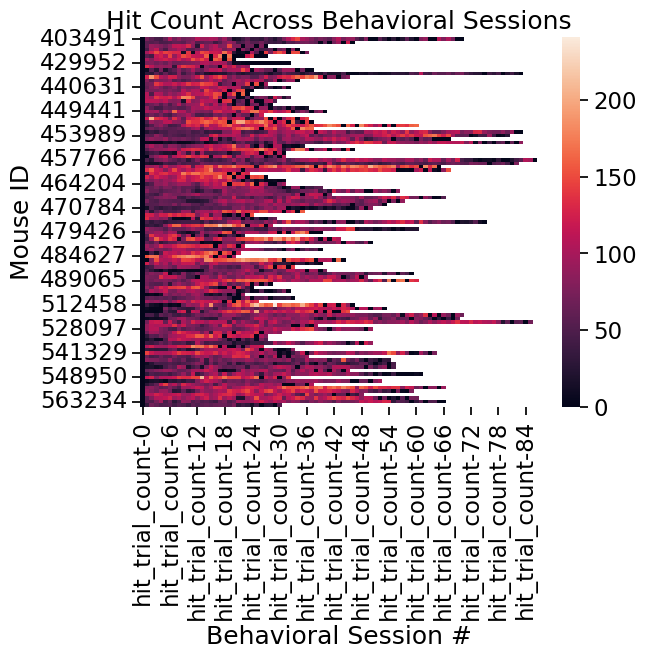

In [15]:
xticks = range(1, 87)

sns.heatmap(df_hitcount_bysession)
plt.xlabel('Behavioral Session #')
plt.ylabel('Mouse ID')

# Adding a title
plt.title('Hit Count Across Behavioral Sessions')

# Display the heatmap
plt.show()

In [16]:
# Sort trials by the number of sessions
n_sessions = behavior_sessions.groupby(['mouse_id']).count()[['session_index']].rename(columns={'session_index':'n_total_sessions'})
n_sessions.head()

,n_total_sessions
mouse_id,
403491,71
412036,47
412366,28
421136,35
423606,37


In [17]:
test = dict(n_sessions)
test.keys()

dict_keys(['n_total_sessions'])

In [18]:
n_sessions_dict = dict(zip(n_sessions.index, n_sessions['n_total_sessions']))
behavior_sessions['n_sessions'] = behavior_sessions['mouse_id'].map(n_sessions_dict)

In [19]:
behavior_sessions

,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,age_in_days,...,correct_reject_trial_count,trial_count,engaged_trial_count,file_id,catch_trial_count,miss_trial_count,hit_trial_count,false_alarm_trial_count,session_index,n_sessions
behavior_session_id,,,,,,,,,,,,,,,,,,,,,
742008131,<NA>,NaN,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,84,...,0,109,99,5784,0,0,0,0,0,71
742797917,<NA>,NaN,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,87,...,12,1517,164,5785,21,69,72,9,1,71
743041166,<NA>,NaN,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,88,...,1,1423,98,5786,7,8,58,6,2,71
743660302,<NA>,NaN,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,89,...,0,1423,64,5787,3,2,45,3,3,71
744374168,<NA>,NaN,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,90,...,0,1574,25,5788,6,0,42,6,4,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106747269,<NA>,NaN,563234,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,182,...,50,404,0,4215,50,354,0,0,62,67
1106963518,1106922443,"[1103781349, 1103781361, 1115891308, 111589131...",563234,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,183,...,46,449,139,-999,47,270,49,1,63,67
1107356081,1107338686,"[1103781349, 1103781361, 1115891308, 111589131...",563234,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,185,...,43,440,126,-999,46,285,50,3,64,67


In [20]:
behavior_sessions

,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,age_in_days,...,correct_reject_trial_count,trial_count,engaged_trial_count,file_id,catch_trial_count,miss_trial_count,hit_trial_count,false_alarm_trial_count,session_index,n_sessions
behavior_session_id,,,,,,,,,,,,,,,,,,,,,
742008131,<NA>,NaN,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,84,...,0,109,99,5784,0,0,0,0,0,71
742797917,<NA>,NaN,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,87,...,12,1517,164,5785,21,69,72,9,1,71
743041166,<NA>,NaN,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,88,...,1,1423,98,5786,7,8,58,6,2,71
743660302,<NA>,NaN,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,89,...,0,1423,64,5787,3,2,45,3,3,71
744374168,<NA>,NaN,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,90,...,0,1574,25,5788,6,0,42,6,4,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106747269,<NA>,NaN,563234,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,182,...,50,404,0,4215,50,354,0,0,62,67
1106963518,1106922443,"[1103781349, 1103781361, 1115891308, 111589131...",563234,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,183,...,46,449,139,-999,47,270,49,1,63,67
1107356081,1107338686,"[1103781349, 1103781361, 1115891308, 111589131...",563234,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,185,...,43,440,126,-999,46,285,50,3,64,67


In [21]:
# Create a pivot table sorted by genotype and number of sessions
behavior_sessions = behavior_sessions.merge(n_sessions, on='mouse_id')
# create a pivot table of the hit rate for each mouse across behavioral session TYPES
df_genotype_hitcount = pd.pivot_table(data=behavior_sessions, index=['cre_line', 'n_total_sessions', 'mouse_id'], columns=['session_index'], values=['hit_trial_count'])


In [22]:

# create a pivot table of the hit rate for each mouse across behavioral session TYPES
df_genotype_sex_hitcount = pd.pivot_table(data=behavior_sessions, index=['cre_line', 'sex', 'n_total_sessions', 'mouse_id'], columns=['session_index'], values=['hit_trial_count'])


Text(0.5, 1.0, 'Hit Count By Genotype Across Behavioral Sessions')

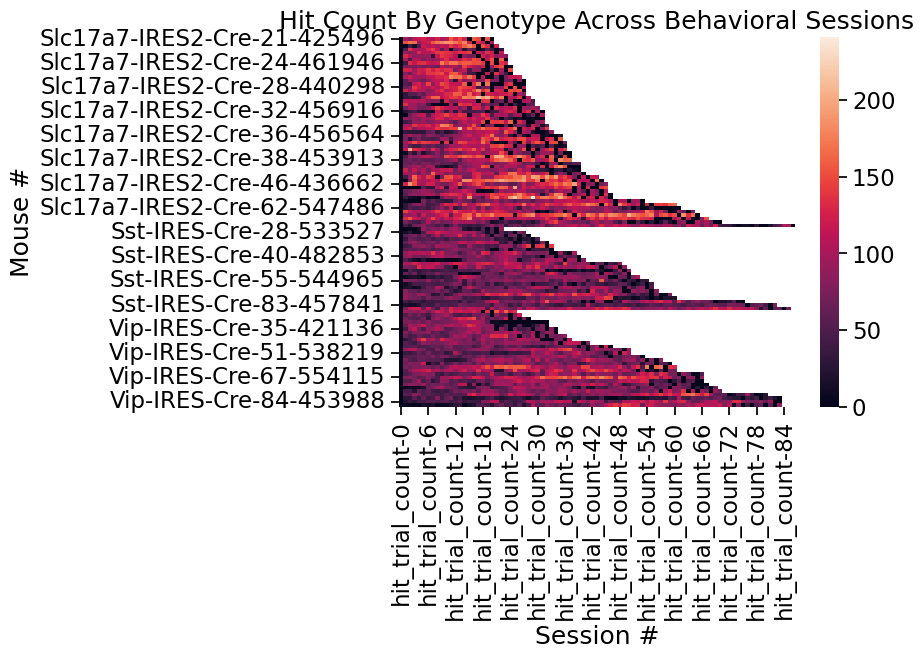

In [23]:
fig, ax = plt.subplots()
ax = sns.heatmap(df_genotype_hitcount, ax=ax)
#ax.set_xticks(np.arange(0, df.shape[1]))
#ax.set_xticklabels(np.arange(0, df.shape[1]))
ax.set_xlabel('Session #')
#ax.set_yticks(np.arange(0, df.shape[0]))
#ax.set_yticklabels(np.arange(0, df.shape[0]))
ax.set_ylabel('Mouse #')
ax.set_title('Hit Count By Genotype Across Behavioral Sessions')

Text(0.5, 1.0, 'Hit Count By Sex Across Behavioral Sessions')

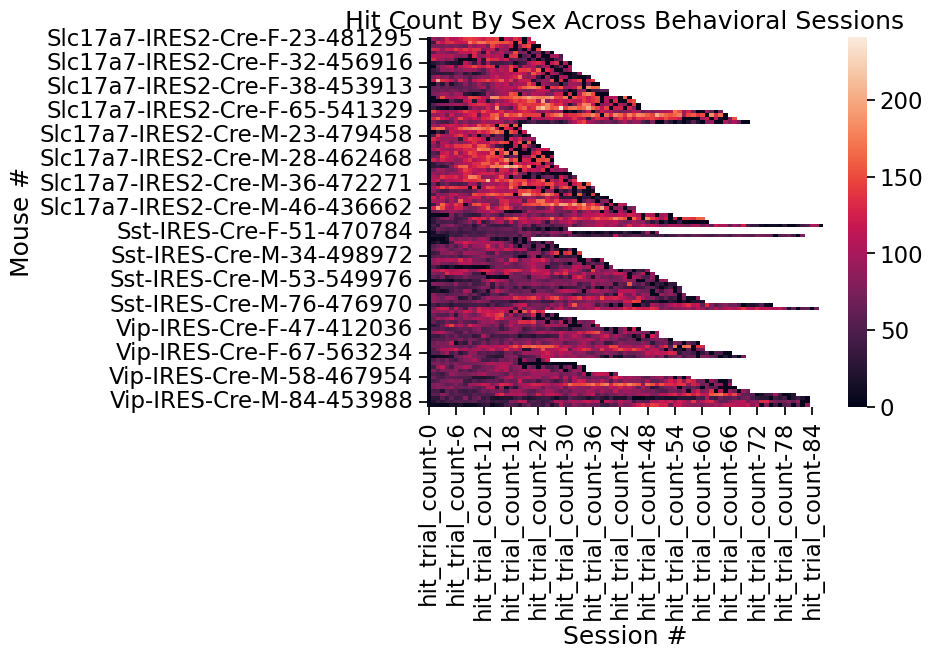

In [24]:
fig, ax = plt.subplots()
ax = sns.heatmap(df_genotype_sex_hitcount, ax=ax)
#ax.set_xticks(np.arange(0, df.shape[1]))
#ax.set_xticklabels(np.arange(0, df.shape[1]))
ax.set_xlabel('Session #')
#ax.set_yticks(np.arange(0, df.shape[0]))
#ax.set_yticklabels(np.arange(0, df.shape[0]))
ax.set_ylabel('Mouse #')
ax.set_title('Hit Count By Sex Across Behavioral Sessions')

In [25]:
subset_behavior_sessions = behavior_sessions[(behavior_sessions.project_code=='VisualBehaviorMultiscope4areasx2d')]

In [26]:
subset_behavior_sessions['session_number']

1209    <NA>
1210    <NA>
1211    <NA>
1212    <NA>
1213    <NA>
        ... 
4777       5
4778       6
4779       4
4780       2
4781       5
Name: session_number, Length: 788, dtype: Int64

In [27]:
subset_behavior_sessions = subset_behavior_sessions[(behavior_sessions.session_number==1) |(behavior_sessions.session_number==3) 
                                                    | (behavior_sessions.session_number==4) | (behavior_sessions.session_number==6)]

/tmp/ipykernel_32065/3342287466.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset_behavior_sessions = subset_behavior_sessions[(behavior_sessions.session_number==1) |(behavior_sessions.session_number==3)


In [53]:
subset_behavior_sessions.columns

Index(['ophys_session_id', 'ophys_container_id', 'mouse_id', 'indicator',
       'full_genotype', 'driver_line', 'cre_line', 'reporter_line', 'sex',
       'age_in_days', 'imaging_plane_group_count', 'project_code',
       'session_type', 'session_number', 'image_set', 'behavior_type',
       'experience_level', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'date_of_acquisition', 'equipment_name', 'num_depths_per_area',
       'ophys_experiment_id', 'num_targeted_structures', 'go_trial_count',
       'correct_reject_trial_count', 'trial_count', 'engaged_trial_count',
       'file_id', 'catch_trial_count', 'miss_trial_count', 'hit_trial_count',
       'false_alarm_trial_count', 'session_index', 'n_sessions',
       'n_total_sessions'],
      dtype='object')

In [42]:
subset_behavior_sessions.groupby(['session_type', 'mouse_id']).count().reset_index().groupby(['session_type']).count()[['mouse_id']]



,mouse_id
session_type,
OPHYS_1_images_G,17
OPHYS_3_images_G,17
OPHYS_4_images_H,17
OPHYS_6_images_H,17


In [45]:
df_genotype_sex_hitcount = pd.pivot_table(data=subset_behavior_sessions, index=['cre_line', 'sex', 'mouse_id'], columns=['session_number'], values=['hit_trial_count'])


In [46]:
df_genotype_sex_hitcount


hit_trial_count                          \
session_number                               1           3           4   
cre_line          sex mouse_id                                           
Slc17a7-IRES2-Cre F   481295             144.0  106.000000  128.500000   
                      484631             150.0  103.000000  111.000000   
                      513630             146.0   54.500000  130.000000   
                  M   472271             120.0  115.000000  136.000000   
                      477052             177.0  107.000000  120.500000   
                      484408             155.0  154.000000  133.000000   
Sst-IRES-Cre      F   570949              41.0   24.000000   26.000000   
                  M   485689             103.0  100.000000   95.000000   
                      524158              61.0   57.000000   61.000000   
                      555970              46.0   74.000000    5.000000   
                      561443              79.0   57.000000   44.666667   
Vip-IRES-Cre      F   489065             137.0  163.000000  171.000000   
                      499478             113.0  131.666667  127.500000   
                      550603              46.0   70.000000   74.000000   
                      563231              70.0   71.000000   12.000000   
                      563234              43.0   32.000000   53.500000   
                  M   554115              72.5   84.000000   84.000000   

                                            
session_number                           6  
cre_line          sex mouse_id              
Slc17a7-IRES2-Cre F   481295    117.000000  
                      484631    165.000000  
                      513630     96.000000  
                  M   472271    158.000000  
                      477052    109.000000  
                      484408    121.000000  
Sst-IRES-Cre      F   570949     51.000000  
                  M   485689     74.000000  
                      524158     70.000000  
                      555970     77.000000  
                      561443     82.000000  
Vip-IRES-Cre      F   489065    131.000000  
                      499478    135.333333  
                      550603    104.000000  
                      563231     66.666667  
                      563234     49.000000  
                  M   554115     93.000000

Text(0.5, 1.0, 'Hit Count By Genotype Across Mixed Familiar/Novel Image Sessions')

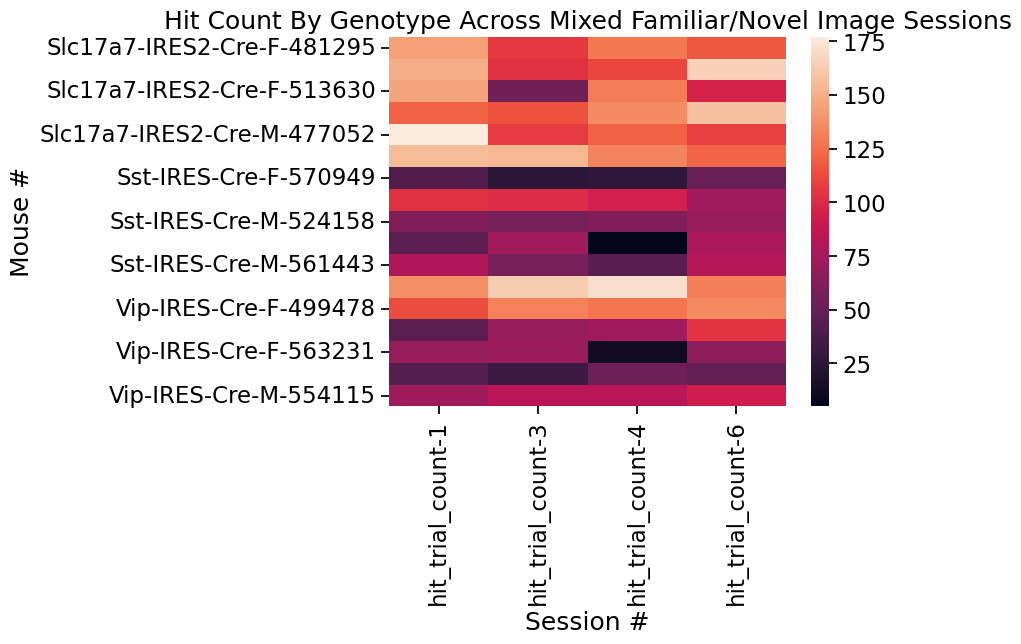

In [47]:
fig, ax = plt.subplots()
ax = sns.heatmap(df_genotype_sex_hitcount, ax=ax)
#ax.set_xticks(np.arange(0, df.shape[1]))
#ax.set_xticklabels(np.arange(0, df.shape[1]))
ax.set_xlabel('Session #')
#ax.set_yticks(np.arange(0, df.shape[0]))
#ax.set_yticklabels(np.arange(0, df.shape[0]))
ax.set_ylabel('Mouse #')
ax.set_title('Hit Count By Genotype Across Mixed Familiar/Novel Image Sessions')

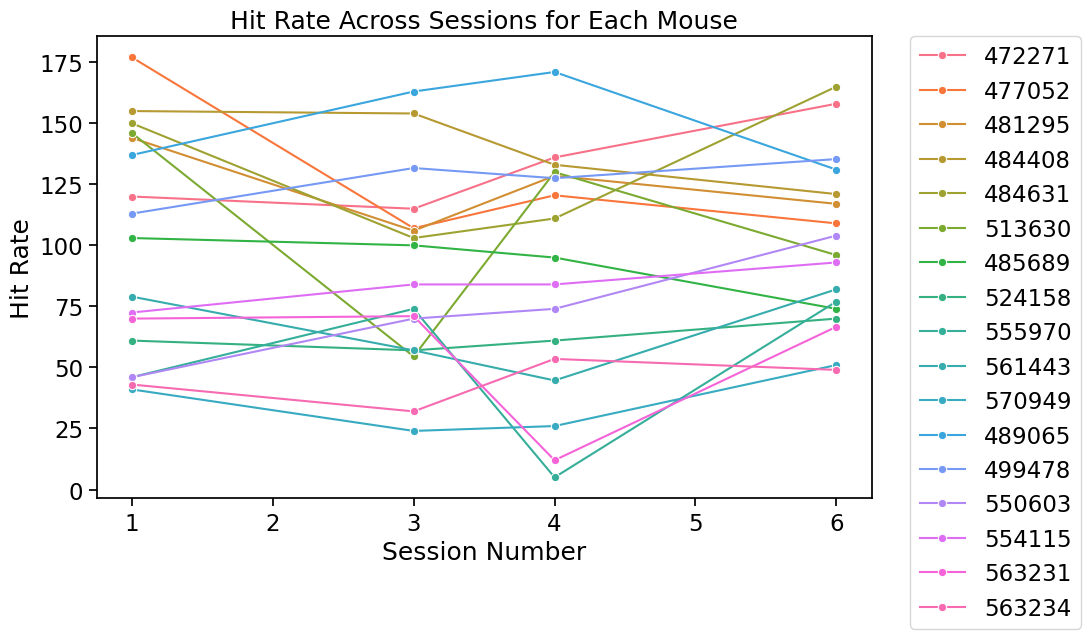

In [48]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=subset_behavior_sessions, x='session_number', y='hit_trial_count', hue='mouse_id', marker='o', errorbar=None)

# Add labels and title
plt.xlabel('Session Number')
plt.ylabel('Hit Rate')
plt.title('Hit Rate Across Sessions for Each Mouse')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Display the plot
plt.show()

In [49]:
familiar_sessions = subset_behavior_sessions[(behavior_sessions.session_number==1) |(behavior_sessions.session_number==3)]
novel_sessions = subset_behavior_sessions[(behavior_sessions.session_number==4) |(behavior_sessions.session_number==6)]

/tmp/ipykernel_32065/238027807.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  familiar_sessions = subset_behavior_sessions[(behavior_sessions.session_number==1) |(behavior_sessions.session_number==3)]
/tmp/ipykernel_32065/238027807.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  novel_sessions = subset_behavior_sessions[(behavior_sessions.session_number==4) |(behavior_sessions.session_number==6)]


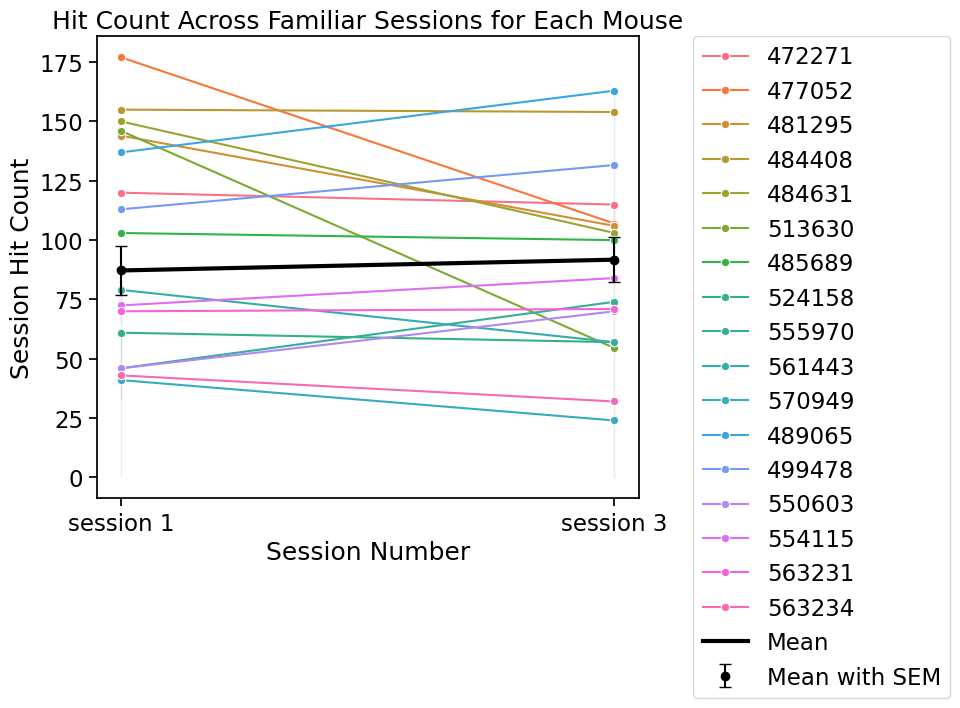

In [50]:
plt.figure(figsize=(7, 6))
sns.lineplot(data=familiar_sessions, x='session_number', y='hit_trial_count', hue='mouse_id', marker='o')

# Calculate the mean and SEM across mice
mean_sem = familiar_sessions.groupby('session_number')['hit_trial_count'].agg(['mean', 'sem']).reset_index()

# Plot the mean as a solid line
plt.plot(mean_sem['session_number'], mean_sem['mean'], color='black', label='Mean', linewidth=3)

# Plot the SEM as a shaded region
#plt.fill_between(mean_sem['session_number'], mean_sem['mean'] - mean_sem['sem'], mean_sem['mean'] + mean_sem['sem'], color='black', alpha=0.3, label='SEM')


# Plot the mean as points
plt.errorbar(mean_sem['session_number'], mean_sem['mean'], yerr=mean_sem['sem'], fmt='o', color='black',
             ecolor='black', elinewidth=1.5, capsize=4, label='Mean with SEM')


# Add labels and title
plt.xlabel('Session Number')
plt.ylabel('Session Hit Count')
plt.title('Hit Count Across Familiar Sessions for Each Mouse')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)
plt.xticks([1,3], ['session 1', 'session 3'])
# Display the plot
plt.show()

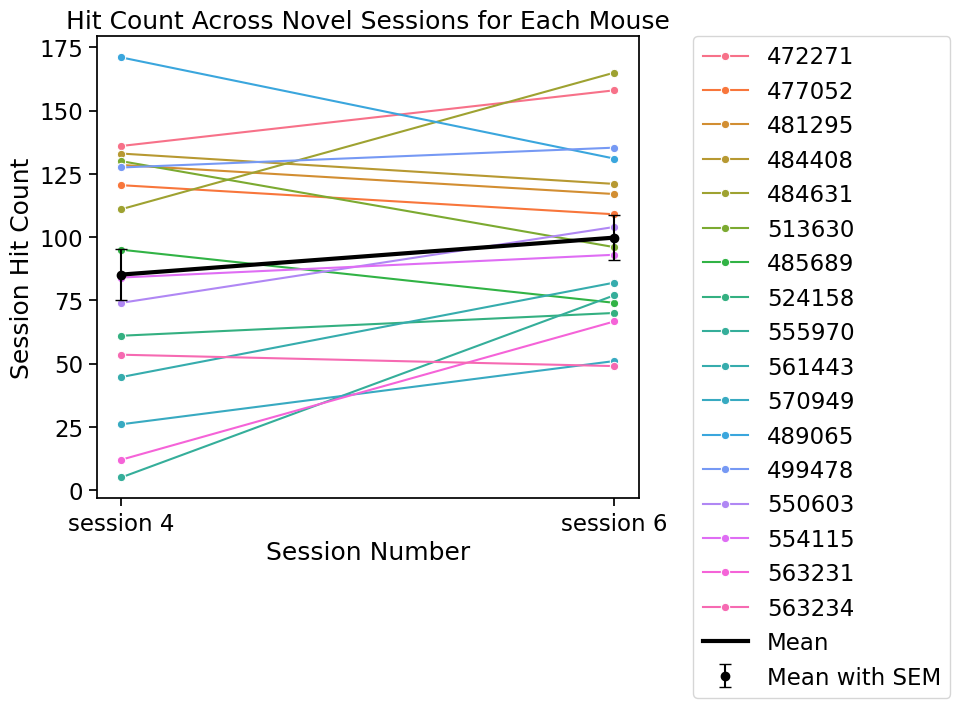

In [52]:
plt.figure(figsize=(7, 6))
sns.lineplot(data=novel_sessions, x='session_number', y='hit_trial_count', hue='mouse_id', marker='o', errorbar=None)

# Calculate the mean and SEM across mice
mean_sem_novel = novel_sessions.groupby('session_number')['hit_trial_count'].agg(['mean', 'sem']).reset_index()

# Plot the mean as a solid line
plt.plot(mean_sem_novel['session_number'], mean_sem_novel['mean'], color='black', label='Mean', linewidth=3)

# Plot the SEM as a shaded region
#plt.fill_between(mean_sem['session_number'], mean_sem['mean'] - mean_sem['sem'], mean_sem['mean'] + mean_sem['sem'], color='black', alpha=0.3, label='SEM')


# Plot the mean as points
plt.errorbar(mean_sem_novel['session_number'], mean_sem_novel['mean'], yerr=mean_sem_novel['sem'], fmt='o', color='black',
             ecolor='black', elinewidth=1.5, capsize=4, label='Mean with SEM')


# Add labels and title
plt.xlabel('Session Number')
plt.ylabel('Session Hit Count')
plt.title('Hit Count Across Novel Sessions for Each Mouse')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)
plt.xticks([4,6], ['session 4', 'session 6'])
# Display the plot
plt.show()

In [72]:
mean_sem

,session_number,mean,sem
0,1,87.217391,10.355911
1,3,91.761905,9.432695


In [73]:
mean_sem_novel

,session_number,mean,sem
0,4,85.166667,9.941253
1,6,99.782609,8.773378


In [ ]:
# REPORT THE FALSE ALARM COUNT

In [54]:
df_genotype_sex_alarmcount = pd.pivot_table(data=subset_behavior_sessions, index=['cre_line', 'sex', 'mouse_id'], columns=['session_number'], values=['false_alarm_trial_count'])


Text(0.5, 1.0, 'False Alarm Count By Genotype Across Mixed Familiar/Novel Image Sessions')

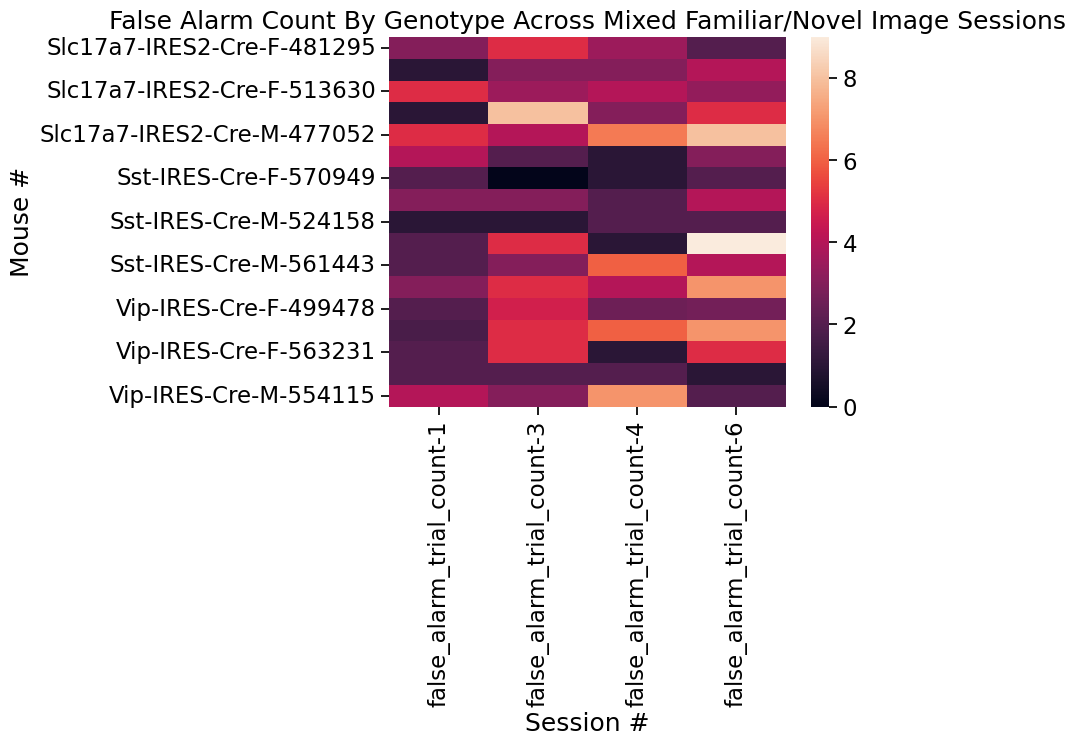

In [56]:
fig, ax = plt.subplots()
ax = sns.heatmap(df_genotype_sex_alarmcount, ax=ax)
#ax.set_xticks(np.arange(0, df.shape[1]))
#ax.set_xticklabels(np.arange(0, df.shape[1]))
ax.set_xlabel('Session #')
#ax.set_yticks(np.arange(0, df.shape[0]))
#ax.set_yticklabels(np.arange(0, df.shape[0]))
ax.set_ylabel('Mouse #')
ax.set_title('False Alarm Count By Genotype Across Mixed Familiar/Novel Image Sessions')

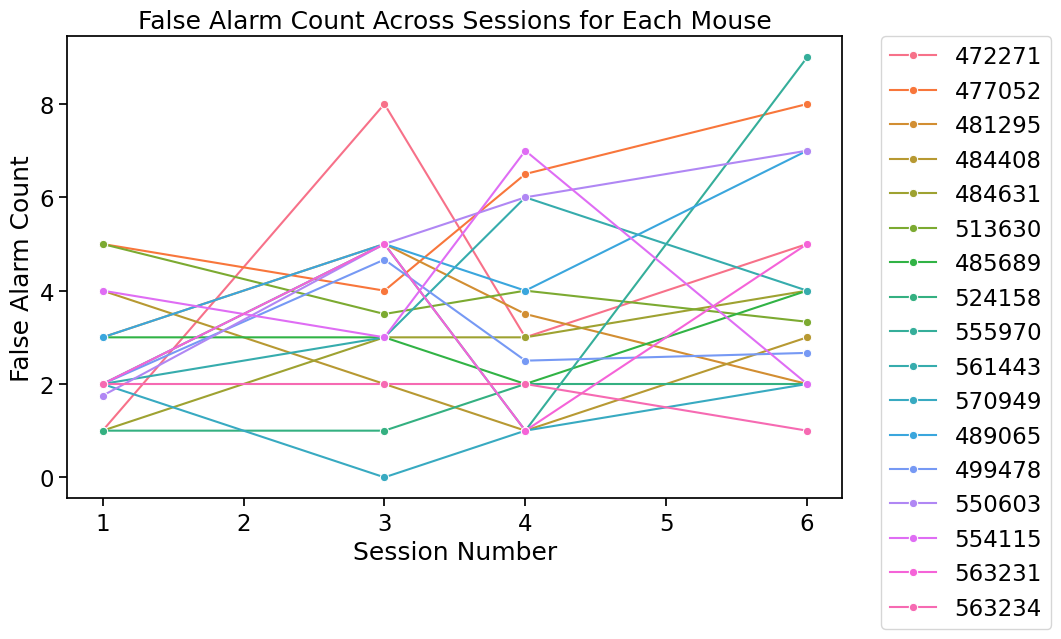

In [57]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=subset_behavior_sessions, x='session_number', y='false_alarm_trial_count', hue='mouse_id', marker='o', errorbar=None)

# Add labels and title
plt.xlabel('Session Number')
plt.ylabel('False Alarm Count')
plt.title('False Alarm Count Across Sessions for Each Mouse')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Display the plot
plt.show()

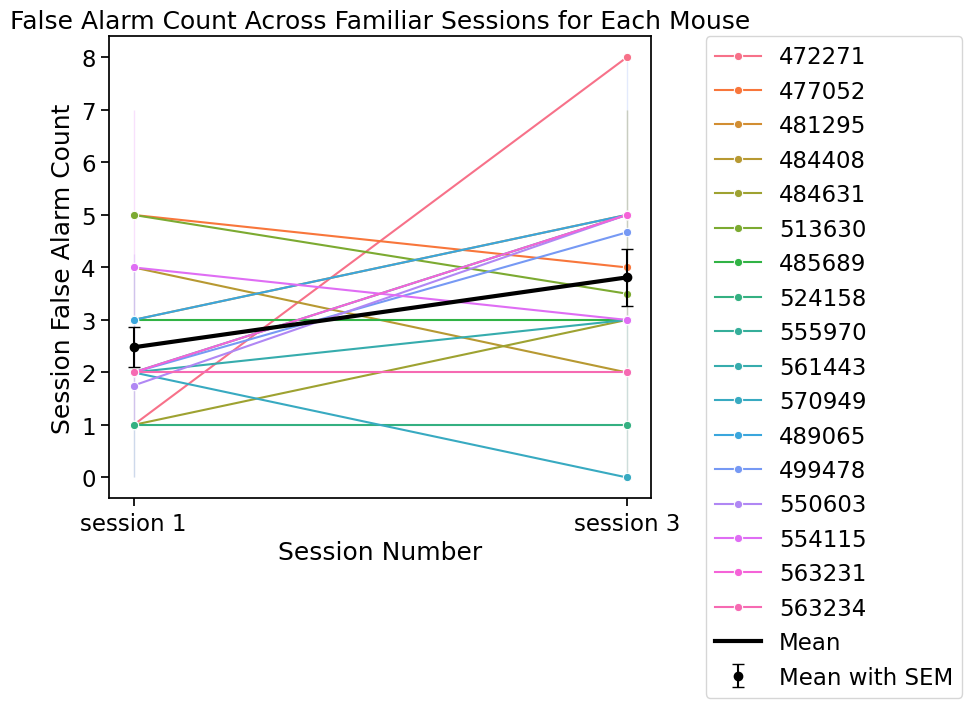

In [58]:
plt.figure(figsize=(7, 6))
sns.lineplot(data=familiar_sessions, x='session_number', y='false_alarm_trial_count', hue='mouse_id', marker='o')

# Calculate the mean and SEM across mice
mean_sem = familiar_sessions.groupby('session_number')['false_alarm_trial_count'].agg(['mean', 'sem']).reset_index()

# Plot the mean as a solid line
plt.plot(mean_sem['session_number'], mean_sem['mean'], color='black', label='Mean', linewidth=3)

# Plot the SEM as a shaded region
#plt.fill_between(mean_sem['session_number'], mean_sem['mean'] - mean_sem['sem'], mean_sem['mean'] + mean_sem['sem'], color='black', alpha=0.3, label='SEM')


# Plot the mean as points
plt.errorbar(mean_sem['session_number'], mean_sem['mean'], yerr=mean_sem['sem'], fmt='o', color='black',
             ecolor='black', elinewidth=1.5, capsize=4, label='Mean with SEM')


# Add labels and title
plt.xlabel('Session Number')
plt.ylabel('Session False Alarm Count')
plt.title('False Alarm Count Across Familiar Sessions for Each Mouse')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)
plt.xticks([1,3], ['session 1', 'session 3'])
# Display the plot
plt.show()

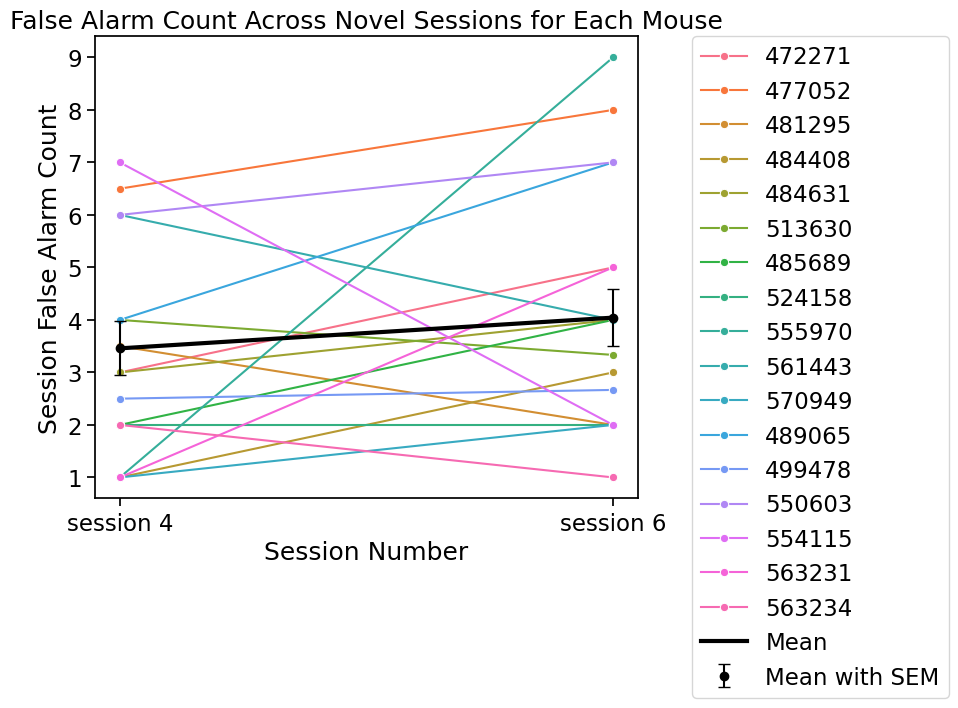

In [59]:
plt.figure(figsize=(7, 6))
sns.lineplot(data=novel_sessions, x='session_number', y='false_alarm_trial_count', hue='mouse_id', marker='o', errorbar=None)

# Calculate the mean and SEM across mice
mean_sem_novel = novel_sessions.groupby('session_number')['false_alarm_trial_count'].agg(['mean', 'sem']).reset_index()

# Plot the mean as a solid line
plt.plot(mean_sem_novel['session_number'], mean_sem_novel['mean'], color='black', label='Mean', linewidth=3)

# Plot the SEM as a shaded region
#plt.fill_between(mean_sem['session_number'], mean_sem['mean'] - mean_sem['sem'], mean_sem['mean'] + mean_sem['sem'], color='black', alpha=0.3, label='SEM')


# Plot the mean as points
plt.errorbar(mean_sem_novel['session_number'], mean_sem_novel['mean'], yerr=mean_sem_novel['sem'], fmt='o', color='black',
             ecolor='black', elinewidth=1.5, capsize=4, label='Mean with SEM')


# Add labels and title
plt.xlabel('Session Number')
plt.ylabel('Session False Alarm Count')
plt.title('False Alarm Count Across Novel Sessions for Each Mouse')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)
plt.xticks([4,6], ['session 4', 'session 6'])
# Display the plot
plt.show()

In [60]:
mean_sem

,session_number,mean,sem
0,1,2.478261,0.381745
1,3,3.809524,0.550407


In [61]:
mean_sem_novel

,session_number,mean,sem
0,4,3.458333,0.514215
1,6,4.043478,0.538914


In [25]:
# Similar to above, but assign index based on session type
# Step 1: Define the mapping dictionary
session_type_mapping = {
    'TRAINING_0': 0, 'TRAINING_1': 1, 'TRAINING_2': 2, 'TRAINING_3': 3,
    'TRAINING_4': 4, 'TRAINING_5': 5,
    'OPHYS_0': 6, 'OPHYS_1': 7, 'OPHYS_2': 8, 'OPHYS_3': 9,
    'OPHYS_4': 10, 'OPHYS_5': 11, 'OPHYS_6': 12
}

# Step 2: Extract the session type prefix and map it to the index
behavior_sessions['session_type_index'] = behavior_sessions['session_type'].apply(
    lambda x: session_type_mapping['_'.join(x.split('_')[:2])]
)

# Now, behavior_sessions has a new column 'session_type_index' with numeric indices
behavior_sessions

,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,age_in_days,...,correct_reject_trial_count,catch_trial_count,engaged_trial_count,go_trial_count,hit_trial_count,file_id,session_index,n_sessions,n_total_sessions,session_type_index
0,<NA>,NaN,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,84,...,0,0,99,0,0,5784,0,71,71,0
1,<NA>,NaN,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,87,...,12,21,164,141,72,5785,1,71,71,1
2,<NA>,NaN,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,88,...,1,7,98,66,58,5786,2,71,71,1
3,<NA>,NaN,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,89,...,0,3,64,47,45,5787,3,71,71,1
4,<NA>,NaN,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,90,...,0,6,25,42,42,5788,4,71,71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4777,<NA>,NaN,563234,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,182,...,50,50,0,354,0,4215,62,67,67,11
4778,1106922443,"[1103781349, 1103781361, 1115891308, 111589131...",563234,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,183,...,46,47,139,319,49,-999,63,67,67,12
4779,1107338686,"[1103781349, 1103781361, 1115891308, 111589131...",563234,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,185,...,43,46,126,335,50,-999,64,67,67,10
4780,1107847105,"[1103781349, 1103781361, 1115891308, 111589131...",563234,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,188,...,51,51,0,352,0,-999,65,67,67,8


In [26]:
subset_behavior_sessions = behavior_sessions[['mouse_id', 'session_type', 'session_type_index', 'session_index']]
subset_behavior_sessions

,mouse_id,session_type,session_type_index,session_index
0,403491,TRAINING_0_gratings_autorewards_15min,0,0
1,403491,TRAINING_1_gratings,1,1
2,403491,TRAINING_1_gratings,1,2
3,403491,TRAINING_1_gratings,1,3
4,403491,TRAINING_1_gratings,1,4
...,...,...,...,...
4777,563234,OPHYS_5_images_H_passive,11,62
4778,563234,OPHYS_6_images_H,12,63
4779,563234,OPHYS_4_images_H,10,64
4780,563234,OPHYS_2_images_G_passive,8,65


In [27]:
filtered_ophys2_behavior_sessions =  behavior_sessions[behavior_sessions['session_type_index'] == 11]
subset_filtered_ophys2_behavior_sessions = filtered_ophys2_behavior_sessions[['mouse_id', 'session_type', 'session_type_index', 'session_index', 'hit_trial_count']]
subset_filtered_ophys2_behavior_sessions

,mouse_id,session_type,session_type_index,session_index,hit_trial_count
63,403491,OPHYS_5_images_B_passive,11,63,0
69,403491,OPHYS_5_images_B_passive,11,69,0
70,403491,OPHYS_5_images_B_passive,11,70,0
96,412366,OPHYS_5_images_B_passive,11,25,0
125,423606,OPHYS_5_images_B_passive,11,26,0
...,...,...,...,...,...
4652,554115,OPHYS_5_images_H_passive,11,65,0
4710,563231,OPHYS_5_images_H_passive,11,56,1
4712,563231,OPHYS_5_images_H_passive,11,58,0
4777,563234,OPHYS_5_images_H_passive,11,62,0


In [28]:
# create a pivot table of the hit rate for each mouse across behavioral session TYPES
df_hitcount_bysessiontype = pd.pivot_table(data=behavior_sessions, index=['cre_line', 'sex', 'mouse_id'], columns=['session_type_index'], values=['hit_trial_count'])
df_hitcount_bysessiontype

hit_trial_count                          \
session_type_index                          0           1           2    
cre_line          sex mouse_id                                           
Slc17a7-IRES2-Cre F   403491               0.0   64.000000   77.500000   
                      412366               0.0   78.750000   97.200000   
                      431252               0.0   45.875000   64.500000   
                      442709               0.0   74.500000   72.000000   
                      447663               0.0  110.500000  109.000000   
...                                        ...         ...         ...   
Vip-IRES-Cre      M   467951               0.0   61.166667   71.000000   
                      467953               0.0   72.285714   45.200000   
                      467954               0.0   65.000000   77.000000   
                      523922               0.0   46.428571   55.571429   
                      554115               0.0   78.333333   60.500000   

                                                                               \
session_type_index                     3           4           5           6    
cre_line          sex mouse_id                                                  
Slc17a7-IRES2-Cre F   403491    72.333333   72.222222         NaN   28.750000   
                      412366    80.000000  102.142857         NaN   77.000000   
                      431252    77.333333  105.500000         NaN   59.750000   
                      442709    70.333333  109.000000   91.750000  124.333333   
                      447663    98.333333   80.000000   78.600000  110.333333   
...                                   ...         ...         ...         ...   
Vip-IRES-Cre      M   467951    75.666667   93.000000   82.684211   71.666667   
                      467953    62.333333   71.421053   89.000000   95.750000   
                      467954    91.000000   87.428571   92.333333   73.500000   
                      523922    66.000000   88.500000   79.529412   79.750000   
                      554115    63.000000   95.000000  130.702128  110.000000   

                                                                           
session_type_index                      7    8      9      10   11     12  
cre_line          sex mouse_id                                             
Slc17a7-IRES2-Cre F   403491     42.000000  9.0   44.5   68.2  0.0   54.5  
                      412366     79.000000  0.0   68.0   69.0  0.0   78.0  
                      431252     60.000000  0.0   76.0   92.0  0.0   69.0  
                      442709    108.500000  0.0   90.0  141.0  0.0  152.0  
                      447663     85.500000  0.0  134.0  138.0  0.0   53.0  
...                                    ...  ...    ...    ...  ...    ...  
Vip-IRES-Cre      M   467951    102.000000  0.0   95.0  115.0  0.0   75.0  
                      467953     73.000000  0.0   88.0   65.0  0.0   28.0  
                      467954     98.000000  0.0   72.0   77.0  0.0   89.0  
                      523922     99.666667  0.0  101.0   69.0  0.0   93.0  
                      554115     72.500000  0.0   84.0   84.0  0.0   93.0  

[107 rows x 13 columns]

<Axes: xlabel='None-session_type_index', ylabel='cre_line-sex-mouse_id'>

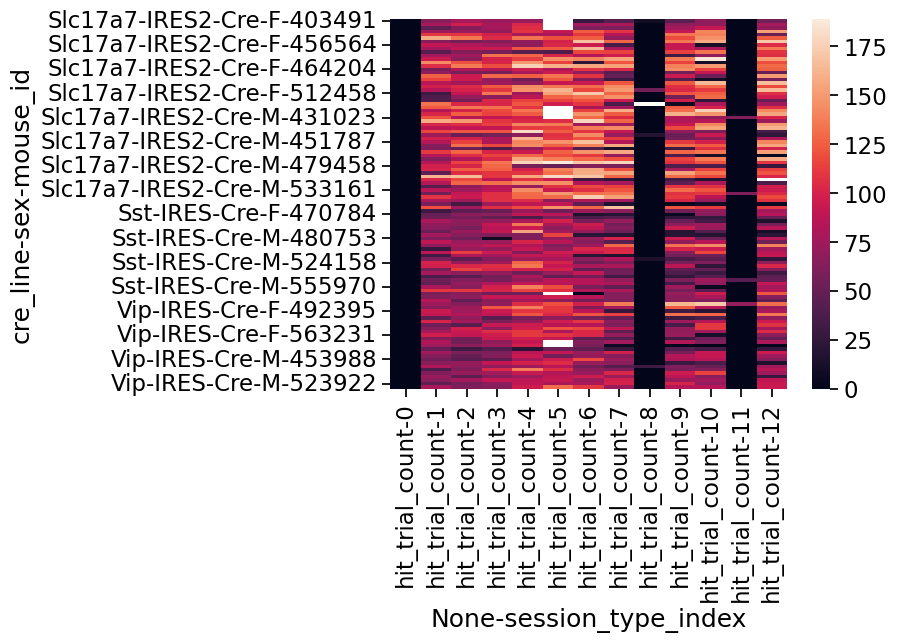

In [29]:
sns.heatmap(df_hitcount_bysessiontype)

In [30]:
# group behavior sessions by genotype, make similar heat map plots

behavior_sessions_sst = behavior_sessions[(behavior_sessions.cre_line=='Sst-IRES-Cre')]
print('Number of Sst sessions: {}'.format(len(behavior_sessions_sst)))

behavior_sessions_vip = behavior_sessions[(behavior_sessions.cre_line=='Vip-IRES-Cre')]
print('Number of Vip sessions: {}'.format(len(behavior_sessions_vip)))

behavior_sessions_slc17a7 = behavior_sessions[(behavior_sessions.cre_line=='Slc17a7-IRES2-Cre')]
print('Number of Slc17a7 sessions: {}'.format(len(behavior_sessions_slc17a7)))


Number of Sst sessions: 1176
Number of Vip sessions: 1521
Number of Slc17a7 sessions: 2085


In [31]:
# create a pivot table of the hit rate for each mouse across behavioral sessions and types

# Sst:
df_sst_hitcount_bysession = pd.pivot_table(data=behavior_sessions_sst, index=['mouse_id'], columns=['session_index'], values=['hit_trial_count'])
df_sst_hitcount_bysessiontype = pd.pivot_table(data=behavior_sessions_sst, index=['mouse_id'], columns=['session_type_index'], values=['hit_trial_count'])

# Vip:
df_vip_hitcount_bysession = pd.pivot_table(data=behavior_sessions_vip, index=['mouse_id'], columns=['session_index'], values=['hit_trial_count'])
df_vip_hitcount_bysessiontype = pd.pivot_table(data=behavior_sessions_vip, index=['mouse_id'], columns=['session_type_index'], values=['hit_trial_count'])

# Slc17a7:
df_slc17a7_hitcount_bysession = pd.pivot_table(data=behavior_sessions_slc17a7, index=['mouse_id'], columns=['session_index'], values=['hit_trial_count'])
df_slc17a7_hitcount_bysessiontype = pd.pivot_table(data=behavior_sessions_slc17a7, index=['mouse_id'], columns=['session_type_index'], values=['hit_trial_count'])




In [32]:
# # Sort by ascending Slc17a7:
# # Step 1: Count the number of non-NaN values (trials) in each row
# df_slc17a7_hitcount_bysession['trial_count'] = df_slc17a7_hitcount_bysession.notna().sum(axis=1)

# # Step 2: Sort the pivot table by the number of trials
# sorted_df_slc17a7_hitcount_bysession = df_slc17a7_hitcount_bysession.sort_values(by='trial_count', ascending=True)

# # Step 3: Remove the temporary 'trial_count' column
# sorted_df_slc17a7_hitcount_bysession = sorted_df_slc17a7_hitcount_bysession.drop(columns='trial_count')

In [33]:
# # Concatenate tables vertically
# #

# pivot_tables = [sorted_df_sst_hitcount_bysession, sorted_df_vip_hitcount_bysession, sorted_df_slc17a7_hitcount_bysession]

# # Step 1: Determine the maximum number of columns
# max_columns = max([df.shape[1] for df in pivot_tables])

# # Step 2: Add NaN columns to tables with fewer columns
# for i, df in enumerate(pivot_tables):
#     if df.shape[1] < max_columns:
#         # Add NaN columns
#         missing_cols = max_columns - df.shape[1]
#         additional_cols = pd.DataFrame(np.nan, index=df.index, columns=list(range(df.shape[1] + 1, df.shape[1] + 1 + missing_cols)))
#         pivot_tables[i] = pd.concat([df, additional_cols], axis=1)

# # Step 3: Concatenate the pivot tables vertically
# stacked_hitcount_bysession = pd.concat(pivot_tables, axis=0, ignore_index=True)


# sns.heatmap(stacked_hitcount_bysession)
# plt.xlabel('Behavioral Session #')
# plt.ylabel('Mouse ID')

# # Adding a title
# plt.title('Hit Count Across Behavioral Sessions (Genotype Grouped)')

# # Display the heatmap
# plt.show()

In [34]:
ophys_cells

,ophys_experiment_id,cell_specimen_id
cell_roi_id,,
1080884343,775614751,1086496928
1080884173,775614751,1086496914
1080883843,775614751,1086496838
1080886674,775614751,1086491756
1080885658,775614751,1086491699
...,...,...
1115385589,1110928073,1120127229
1115385513,1110928073,1120127083
1115301580,1110928075,1120126794


In [10]:
ophys_experiments.groupby(['ophys_container_id', 'session_type']).count()[['ophys_session_id']]

ophys_session_id
ophys_container_id session_type                              
782536745          OPHYS_1_images_A                         1
                   OPHYS_2_images_A_passive                 1
                   OPHYS_5_images_B_passive                 1
                   OPHYS_6_images_B                         1
791352433          OPHYS_1_images_A                         1
...                                                       ...
1116527497         OPHYS_1_images_G                         1
                   OPHYS_2_images_G_passive                 1
                   OPHYS_3_images_G                         1
                   OPHYS_4_images_H                         1
                   OPHYS_6_images_H                         1

[1739 rows x 1 columns]

In [11]:
# Merge the ophys_experiment_table with the ophys_cells_table to add metadata for each cell
ophys_cells = ophys_cells.merge(ophys_experiments, on='ophys_experiment_id')


In [12]:
ophys_cells

,ophys_experiment_id,cell_specimen_id,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,...,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
0,775614751,1086496928,775378326,775289198,782536745,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,...,False,Familiar,1,44,5,2018-11-08 11:22:06.936000+00:00,CAM2P.5,2021-03-25,730814230,1905
1,775614751,1086496914,775378326,775289198,782536745,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,...,False,Familiar,1,44,5,2018-11-08 11:22:06.936000+00:00,CAM2P.5,2021-03-25,730814230,1905
2,775614751,1086496838,775378326,775289198,782536745,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,...,False,Familiar,1,44,5,2018-11-08 11:22:06.936000+00:00,CAM2P.5,2021-03-25,730814230,1905
3,775614751,1086491756,775378326,775289198,782536745,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,...,False,Familiar,1,44,5,2018-11-08 11:22:06.936000+00:00,CAM2P.5,2021-03-25,730814230,1905
4,775614751,1086491699,775378326,775289198,782536745,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,...,False,Familiar,1,44,5,2018-11-08 11:22:06.936000+00:00,CAM2P.5,2021-03-25,730814230,1905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133061,1110928073,1120127229,1110816270,1110797833,1115959875,570949,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,...,False,Novel >1,0,2,5,2021-06-22 09:06:03.689000+00:00,MESO.1,2021-08-12,1094828808,813
133062,1110928073,1120127083,1110816270,1110797833,1115959875,570949,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,...,False,Novel >1,0,2,5,2021-06-22 09:06:03.689000+00:00,MESO.1,2021-08-12,1094828808,813
133063,1110928075,1120126794,1110816270,1110797833,1115959878,570949,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,...,False,Novel >1,0,2,5,2021-06-22 09:06:03.689000+00:00,MESO.1,2021-08-12,1094828808,814
133064,1110928075,1120126500,1110816270,1110797833,1115959878,570949,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,...,False,Novel >1,0,2,5,2021-06-22 09:06:03.689000+00:00,MESO.1,2021-08-12,1094828808,814


In [15]:
cell_specimen_id = 1120127083
cell_metadata = ophys_cells[ophys_cells.cell_specimen_id==cell_specimen_id]
cell_metadata.session_type.unique()
# ophys_cells_table[ophys_cells_table.cell_specimen_id==cell_specimen_id].session_type.unique()

array(['OPHYS_1_images_G', 'OPHYS_2_images_G_passive', 'OPHYS_3_images_G',
       'OPHYS_4_images_H', 'OPHYS_6_images_H'], dtype=object)

In [1]:
# Up to here is the standard loading of the AllenSDK's `VisualBehaviorOphysProjectCache` 
# which loads the `ophys_experiment_table` (full VBO dataset).







In [46]:
ophys_cells_table

,ophys_experiment_id,cell_specimen_id
cell_roi_id,,
1080884343,775614751,1086496928
1080884173,775614751,1086496914
1080883843,775614751,1086496838
1080886674,775614751,1086491756
1080885658,775614751,1086491699
...,...,...
1115385589,1110928073,1120127229
1115385513,1110928073,1120127083
1115301580,1110928075,1120126794


In [ ]:
# get all Sst experiments for ophys session 4
sst_ophyssession4_experiment_table = ophys_experiment_table[(ophys_experiment_table.cre_line=='Sst-IRES-Cre')&
                        (ophys_experiment_table.session_number==4) &
                        (ophys_experiment_table.prior_exposures_to_image_set==0)]
print('Number of experiments: {}'.format(len(selected_experiment_table)))